# Datasets and ANN with PyTorch

## Import

In [59]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the Data

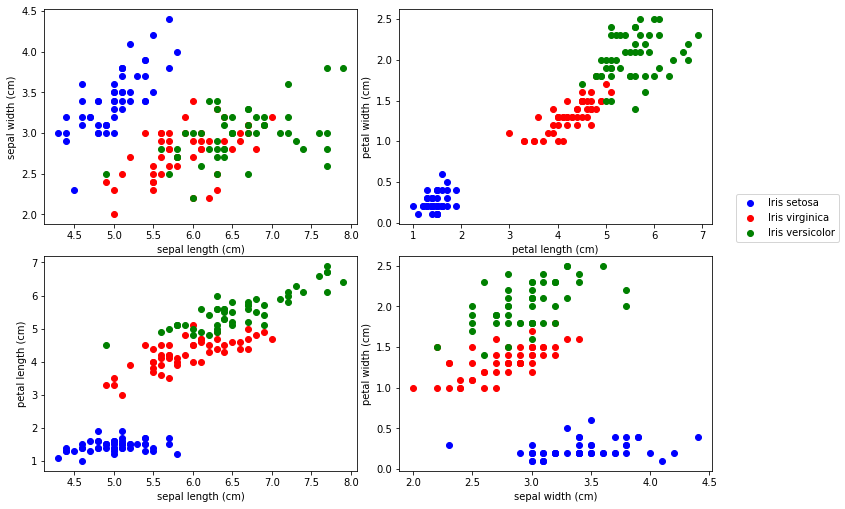

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.5))
plt.show()

## The classic method for building train/test split tensors

In [62]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.FloatTensor(train_y).reshape(-1,1)
y_test = torch.FloatTensor(test_y).reshape(-1,1)

In [63]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0., 1., 2.])
Counts: tensor([42, 42, 36])


## Using PyTorch's Dataset and DataLoader classes

In [64]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop("target", axis= 1).values
labels = df["target"].values

iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [65]:
print(len(iris))
print(type(iris))

150
<class 'torch.utils.data.dataset.TensorDataset'>


In [66]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [67]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [68]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[6.3000, 2.3000, 4.4000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.9000, 3.8000, 6.4000

In [69]:
list(iris_loader)[0][1].bincount()

tensor([34, 34, 37])

In [70]:
next(iter(iris_loader))

[tensor([[6.0000, 2.2000, 5.0000, 1.5000],
         [5.8000, 2.7000, 4.1000, 1.0000],
         [6.4000, 3.1000, 5.5000, 1.8000],
         [5.1000, 3.5000, 1.4000, 0.3000],
         [7.3000, 2.9000, 6.3000, 1.8000],
         [6.6000, 2.9000, 4.6000, 1.3000],
         [4.8000, 3.4000, 1.6000, 0.2000],
         [4.8000, 3.1000, 1.6000, 0.2000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [5.0000, 2.3000, 3.3000, 1.0000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [6.2000, 3.4000, 5.4000, 2.3000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.8000, 3.0000, 5.5000, 2.1000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [7.7000, 3.8000, 6.7000, 2.2000],
         [5.5000, 3.5000, 1.3000, 0.2000],
         [7.7000, 3.0000, 6.1000, 2.3000],
         [6

## Fundamentals of OOP

In [71]:
import torch.nn as nn
import torch.nn.functional as F

In [72]:
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # How many LAYERS?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # input layer
        self.fc2 = nn.Linear(h1, h2) # hidden layer
        self.out = nn.Linear(h2, out_features) # output layer

        # İnput layer (4 features) -> hidden layer 1 -> h2 -> h3 -> output (3classes)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [73]:
torch.manual_seed(32)
model = Model() 

In [74]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [75]:
X = df.drop("target", axis=1)
y = df["target"]

In [76]:
X = X.values
y = y.values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [79]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [80]:
model.parameters()

<generator object Module.parameters at 0x000001DDA1235BD0>

In [81]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.15071142
epoch: 11  loss: 0.93773156
epoch: 21  loss: 0.77982563
epoch: 31  loss: 0.60994017
epoch: 41  loss: 0.40079936
epoch: 51  loss: 0.25436327
epoch: 61  loss: 0.15053055
epoch: 71  loss: 0.10086947
epoch: 81  loss: 0.08128316
epoch: 91  loss: 0.07231428


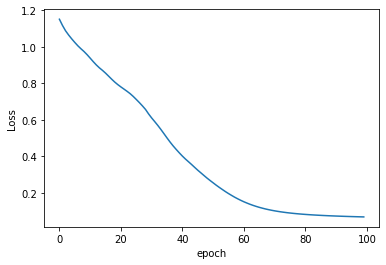

In [82]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the Model

In [83]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [84]:
loss

tensor(0.0581)

In [85]:
correct= 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.1252,  4.8064, -0.8628])     1
 2. tensor([-1.7985,  5.3098, -1.5449])     1
 3. tensor([  6.3542,   0.8438, -10.0541])  0
 4. tensor([-3.9123,  4.5958,  1.1693])     1
 5. tensor([-7.4713,  3.2021,  5.7853])     2
 6. tensor([-10.4976,   1.6459,   9.6297])  2
 7. tensor([  6.3201,   0.9917, -10.1532])  0
 8. tensor([  7.0468,   0.7059, -10.9137])  0
 9. tensor([-7.2061,  3.3477,  5.3565])     2
10. tensor([-9.3960,  2.5759,  8.1033])     2
11. tensor([-9.8808,  2.3475,  8.7141])     2
12. tensor([ 6.2748,  0.6655, -9.7613])     0
13. tensor([-9.3142,  2.1880,  8.1947])     2
14. tensor([-3.7803,  4.5050,  1.0752])     1
15. tensor([-7.8657,  3.0117,  6.2303])     2
16. tensor([-1.8867,  5.1572, -1.3345])     1
17. tensor([-5.7006,  3.5030,  3.6696])     2
18. tensor([  7.1789,   0.7369, -11.1350])  0
19. tensor([-3.2944,  4.7931,  0.3475])     1
20. tensor([-7.7665,  3.7629,  5.7095])     2
21. tensor([  6.6499,   0.7889, -10.4252])  0
22. tensor([  7.4357,   0.8918, -1

In [86]:
torch.save(model.state_dict(),"my_iris.pt")

In [87]:
new_model = Model()
new_model.load_state_dict(torch.load("my_iris.pt"))

<All keys matched successfully>

In [88]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [89]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

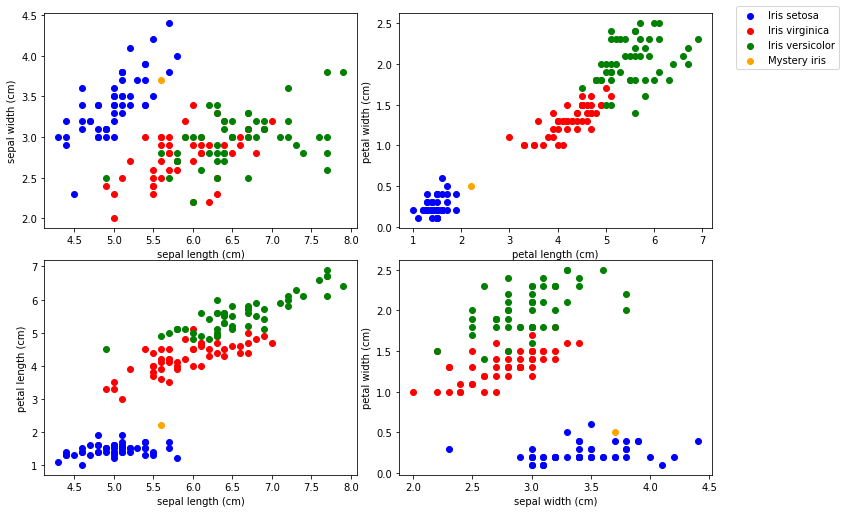

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='orange')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [94]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  5.9522,   1.5596, -10.0054])

Iris setosa
